In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

import numpy as np
from tensorflow.keras.utils import to_categorical, plot_model

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [5]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 2ms/step - loss: 0.1444 - accuracy: 0.9554
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0463 - accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0335 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0252 - accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0201 - accuracy: 0.9936
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0163 - accuracy: 0.9947
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0130 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0121 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0092 - accuracy: 0.9969
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.00

In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0361 - accuracy: 0.9911 - 577ms/epoch - 2ms/step


In [9]:
print(test_acc)

0.991100013256073


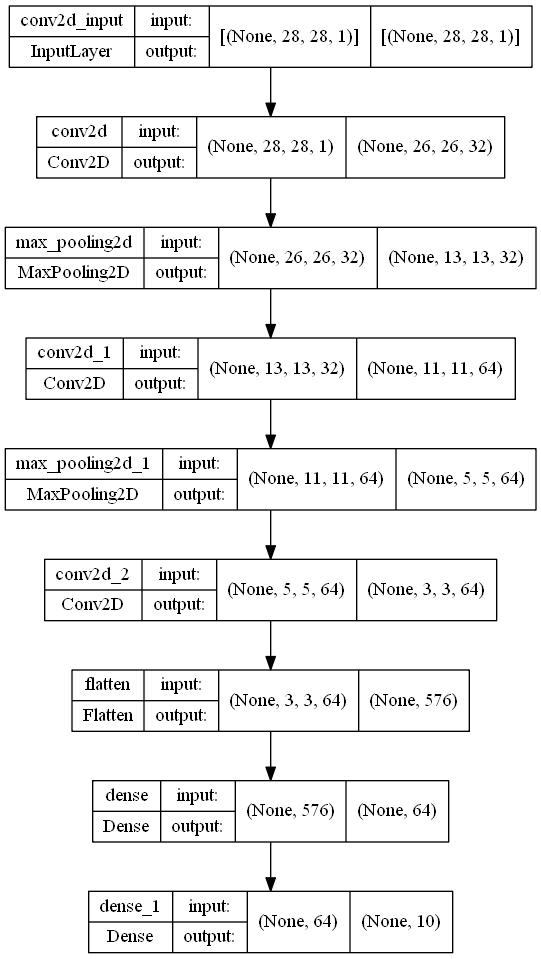

In [10]:
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)